<a href="https://colab.research.google.com/github/likhita-karanam/Deep-learning/blob/master/Credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Self Organizing Maps
### Class 1 are the customers whose applications got approved
### They may be fraudulent

##Install MiniSom Package

In [1]:
!pip install MiniSom

  Created wheel for MiniSom: filename=MiniSom-2.2.6-cp36-none-any.whl size=8525 sha256=ea3bd41c936f1595efebd54a4d1eda4ac002b7b9a9df90efebd7e27a9aa7e0f6
  Stored in directory: /root/.cache/pip/wheels/b8/c6/01/330066e36e1f7c826c96f656f9185822cfcdef0591315949ea
Successfully built MiniSom


### Importing the libraries


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import *

## Importing the dataset

In [3]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

## Feature Scaling


In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

##Training the SOM


In [5]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

##Visualizing the results


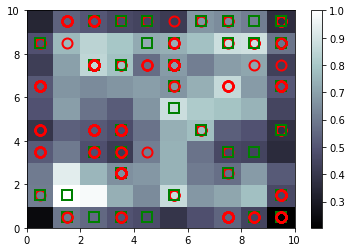

In [6]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [35]:
distance_map = som.distance_map().round(1)

## Finding the frauds


In [33]:
mappings = som.win_map(X)
mappings.keys()


dict_keys([(9, 6), (5, 7), (2, 7), (1, 0), (5, 1), (4, 9), (7, 6), (2, 4), (7, 3), (7, 2), (9, 0), (3, 3), (9, 4), (3, 9), (8, 8), (2, 3), (9, 9), (3, 2), (6, 4), (7, 0), (0, 3), (9, 8), (3, 0), (9, 1), (7, 9), (1, 9), (3, 4), (5, 6), (0, 6), (5, 9), (0, 1), (6, 9), (2, 9), (0, 4), (5, 8), (3, 7), (8, 9), (8, 0), (4, 7), (9, 7), (7, 8), (0, 8), (8, 3), (5, 5), (4, 0), (4, 8), (1, 8), (8, 7), (4, 3), (1, 1), (2, 0)])

In [36]:
index = []
for i in range(10):
    for j in range(10):
        if(distance_map[i,j]>=0.5):
            index.append([i,j])
len(index)


85

##Printing the Fraunch Clients

In [38]:
fraud_list=[]
sum = 0
for x in index:
    fraud_list.append(mappings[(x[0],x[1])])
    sum = sum + len(mappings[(x[0],x[1])])
sum

552

In [40]:
frauds = []
for x in fraud_list:
    for y in x:
        frauds.append(y)
fraud_array = np.asarray(frauds)
fraud_inverse_transformed = sc.inverse_transform(frauds)
print('Fraud Customer IDs')
for i in fraud_inverse_transformed[:, 0]:
  print(int(i))

Fraud Customer IDs
15775750
15690372
15775235
15780088
15762045
15750476
15799859
15789014
15767264
15761854
15815040
15788442
15633944
15801072
15573798
15647295
15594305
15664793
15670029
15763579
15662189
15793825
15696361
15568469
15782159
15586479
15717700
15705379
15750104
15646535
15749964
15586183
15607988
15632010
15627365
15576680
15620570
15592412
15687688
15638610
15789611
15668679
15738487
15649160
15773421
15682686
15781875
15809837
15621244
15636521
15632789
15761554
15707602
15811690
15815095
15720725
15567834
15591035
15672912
15694677
15598614
15608804
15631267
15611189
15759387
15712483
15572361
15698522
15772941
15605872
15704581
15725776
15697460
15737998
15718921
15683993
15797767
15744044
15804235
15700300
15791944
15646190
15694530
15730287
15720353
15736510
15736420
15737542
15748986
15663942
15767729
15711446
15720529
15787693
15688210
15793366
15793317
15735106
15692430
15683276
15768777
15791326
15779586
15730150
15662854
15610042
15568162
15745375
15638983
